In [7]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100
from IPython.display import set_matplotlib_formats as set_fmt
set_fmt('svg')
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Create Noisy Signal

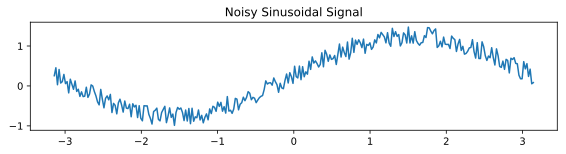

In [8]:
# Sampling frequency
fs = 300


# Create a random number generator
rng = np.random.default_rng(1)

# Create the x-axis
x = np.linspace(-np.pi, np.pi, 300)

# Signal: Sinusoidal wave with some noise
sig = np.sin(x) + rng.random(x.shape) * 0.5

# Plot the noisy signal
plt.figure(figsize=(9.5, 2))
plt.plot(x, sig)
plt.title('Noisy Sinusoidal Signal')
plt.show()


# Perform FFT

In [9]:
fx = fftpack.fft(sig, axis=0)
amp = np.abs(fx)

# Frequency axis (positive frequencies only)
rf = np.linspace(0, fs/2, 150)

# Mirror the frequency axis to get full spectrum (for plotting)
rf_full = np.concatenate((rf, rf[::-1]), axis=0)

# Create a filter (low pass filter for frequencies < 5 Hz)
H = np.array(rf_full < 5, dtype=np.float64)

# Apply the filter to the frequency domain signal
fx_filtered = np.multiply(fx, H)  # H * fx


# Plot

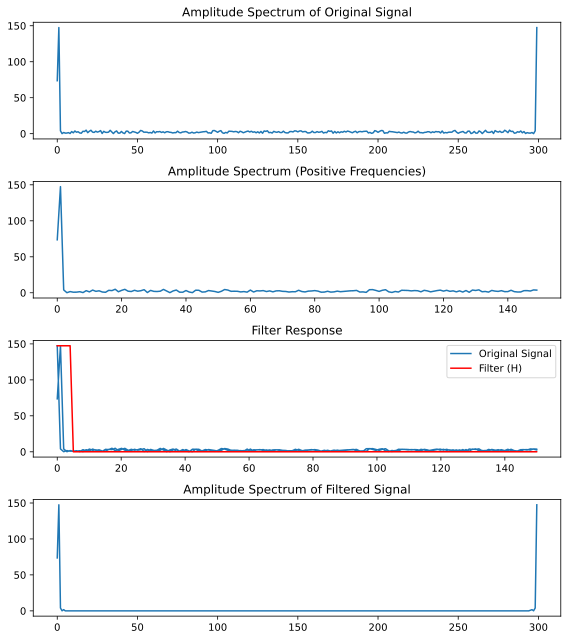

In [10]:
# Create a 4x1 grid for plotting
plt.figure(figsize=(8, 9))

plt.subplot(4, 1, 1)
plt.plot(amp)  # Plot the amplitude spectrum of the unfiltered signal
plt.title('Amplitude Spectrum of Original Signal')

# Plot the positive half of the amplitude spectrum
plt.subplot(4, 1, 2)
plt.plot(amp[:150])
plt.title('Amplitude Spectrum (Positive Frequencies)')

# Plot the frequency response of the filter
plt.subplot(4, 1, 3)
plt.plot(rf_full, amp[:300], label='Original Signal')
plt.plot(rf_full, H * np.max(amp), 'r', label='Filter (H)')
plt.legend()
plt.title('Filter Response')

# Plot the filtered signal in the frequency domain
plt.subplot(4, 1, 4)
plt.plot(np.abs(fx_filtered))
plt.title('Amplitude Spectrum of Filtered Signal')

plt.tight_layout()
plt.show()

# Inverse Fourier Transform

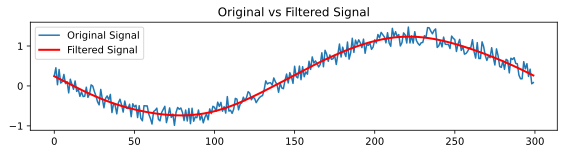

In [11]:
# Perform inverse FFT to get the filtered signal back in the time domain
sig_new = np.real(fftpack.ifft(fx_filtered))

# Plot the original noisy signal and the filtered signal
plt.figure(figsize=(9.5, 2))
plt.plot(sig, label='Original Signal')
plt.plot(sig_new, 'r', linewidth=2, label='Filtered Signal')
plt.legend()
plt.title('Original vs Filtered Signal')
plt.show()